In [2]:
import pandas as pd

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
# Función para generar el número binario
def generar_binario(row):
    binario = ''
    for tipo in tipos_falla:
        binario += str(row[tipo])
    return binario

# Aplicar la función a cada fila del DataFrame
data['Binario'] = data.apply(generar_binario, axis=1)

# Imprimir los resultados
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT', 'Binario']])


      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT      Binario
0      1   0  0   0   0   0     0   0  0  0   0  10000000000
1      1   0  0   0   0   0     0   0  0  0   0  10000000000
2      1   0  0   0   0   0     0   0  0  0   0  10000000000
3      1   0  0   0   0   0     0   0  0  0   0  10000000000
4      0   1  0   0   0   0     0   0  0  0   0  01000000000
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..          ...
1443   0   0  0   1   0   0     0   0  0  0   0  00010000000
1444   0   0  0   1   0   0     0   0  0  0   0  00010000000
1445   0   0  0   0   0   0     1   0  0  0   0  00000010000
1446   0   0  0   0   1   0     0   0  0  0   0  00001000000
1447   0   1  0   0   0   0     0   0  0  0   0  01000000000

[1448 rows x 12 columns]


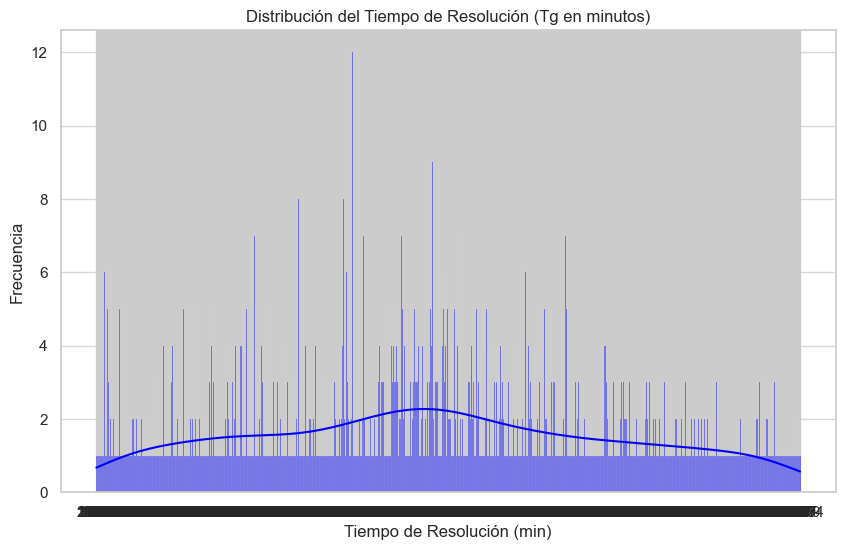

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma del tiempo de resolución
plt.figure(figsize=(10, 6))
sns.histplot(data['Tg (min)'], bins=30, kde=True, color='blue')
plt.title('Distribución del Tiempo de Resolución (Tg en minutos)')
plt.xlabel('Tiempo de Resolución (min)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


C:\Users\Amalia\AppData\Local\Temp\ipykernel_4000\1243567381.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_1.index, y=frecuencia_1.values, palette='viridis')
C:\Users\Amalia\AppData\Local\Temp\ipykernel_4000\1243567381.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Intervalo', y='Frecuencia', data=frecuencia_2, palette='viridis')


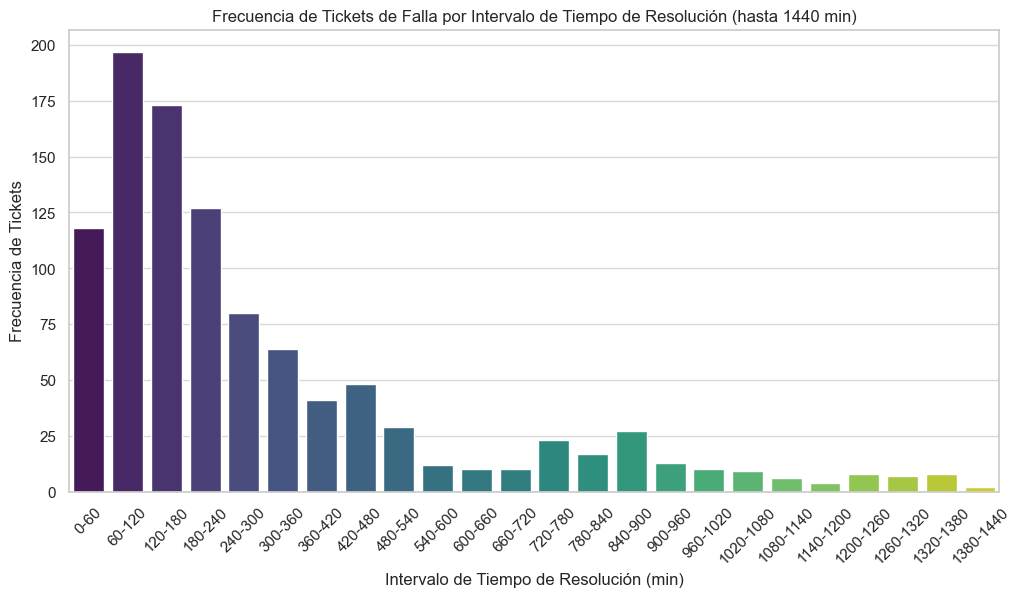

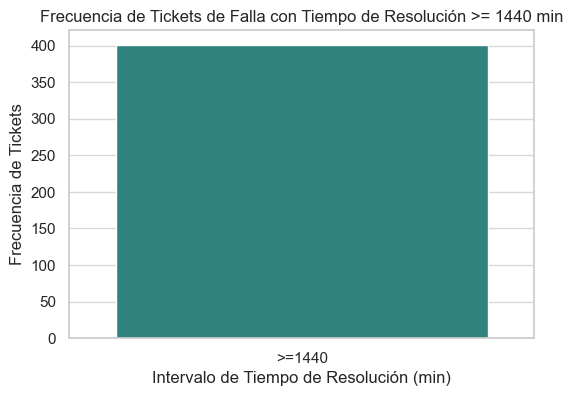

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Crear intervalos de 60 minutos hasta 1440 minutos
bins_1 = range(0, 1441, 60)  # Definir los límites de los intervalos de 0 a 1440 en pasos de 60
labels_1 = [f"{i}-{i + 60}" for i in bins_1[:-1]]  # Crear etiquetas para los intervalos

# Asignar cada tiempo de resolución a su intervalo correspondiente (hasta 1440 min)
data['Intervalo_1'] = pd.cut(data['Tg (min)'], bins=bins_1, labels=labels_1, right=False)

# Contar la frecuencia de tickets en cada intervalo (hasta 1440 min)
frecuencia_1 = data['Intervalo_1'].value_counts().sort_index()

# Crear un DataFrame para los tickets con tiempo de resolución >= 1440 min
data_2 = data[data['Tg (min)'] >= 1440]

# Contar la frecuencia de tickets con tiempo de resolución >= 1440 min
frecuencia_2 = pd.DataFrame({'Intervalo': ['>=1440'], 'Frecuencia': [len(data_2)]})

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el primer gráfico de barras (hasta 1440 min)
plt.figure(figsize=(12, 6))
sns.barplot(x=frecuencia_1.index, y=frecuencia_1.values, palette='viridis')
plt.title('Frecuencia de Tickets de Falla por Intervalo de Tiempo de Resolución (hasta 1440 min)')
plt.xlabel('Intervalo de Tiempo de Resolución (min)')
plt.ylabel('Frecuencia de Tickets')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

# Crear el segundo gráfico de barras (>=1440 min)
plt.figure(figsize=(6, 4))
sns.barplot(x='Intervalo', y='Frecuencia', data=frecuencia_2, palette='viridis')
plt.title('Frecuencia de Tickets de Falla con Tiempo de Resolución >= 24 horas')
plt.xlabel('Intervalo de Tiempo de Resolución (min)')
plt.ylabel('Frecuencia de Tickets')
plt.grid(axis='y', alpha=0.75)

plt.show()


C:\Users\Amalia\AppData\Local\Temp\ipykernel_1332\2417279239.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')


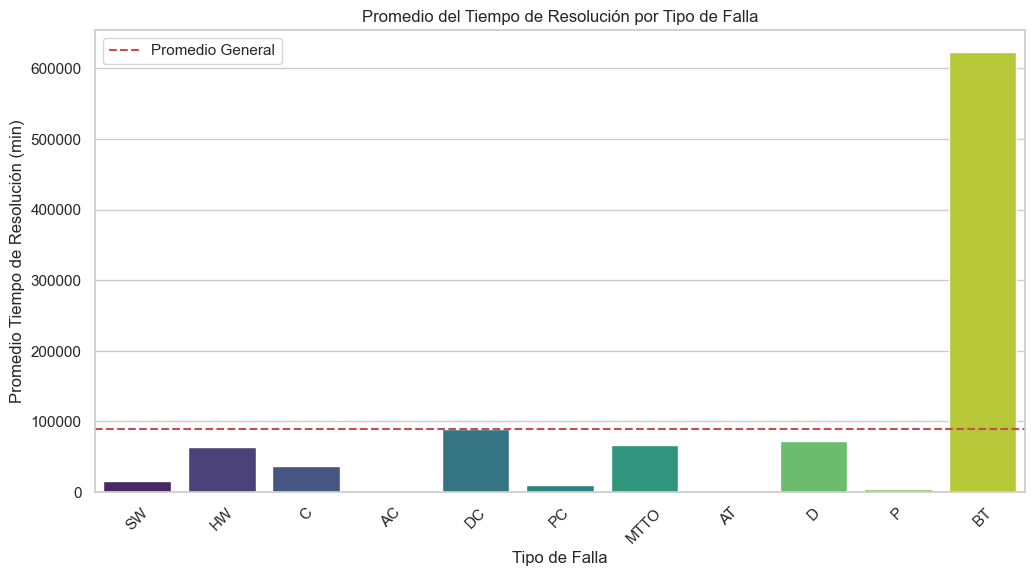

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Lista de tipos de fallas
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Calcular promedios
promedios = {}
for tipo in tipos_falla:
    promedios[tipo] = data[data[tipo] == 1]['Tg (min)'].mean()

# Crear un DataFrame para los promedios
df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Falla', 'Promedio Tiempo (min)'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')
plt.title('Promedio del Tiempo de Resolución por Tipo de Falla')
plt.xlabel('Tipo de Falla')
plt.ylabel('Promedio Tiempo de Resolución (min)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.axhline(y=df_promedios['Promedio Tiempo (min)'].mean(), color='r', linestyle='--', label='Promedio General')  # Línea media
plt.legend()
plt.show()
